# Proyecto 2 - _House Prices_.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Regresiones
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
#from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

# Estandarizar y centrar
from sklearn.preprocessing import StandardScaler

# train-test
from sklearn.model_selection import train_test_split
#from tabulate import tabulate

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

from statsmodels.tools.eval_measures import rmse  # mse
from random import sample  # random samples with replacement

# Primero se leen los datos. 

+ Voy a juntar ambos conjuntos de datos para explorarlos al mismo tiempo.
+ 80 columnas y 2919 observaciones.

In [7]:
house_train = pd.read_csv('Datos/train.csv')
house_test = pd.read_csv('Datos/test.csv')
real_response = pd.read_csv('Datos/sample_submission.csv')

# juntando ambos conjuntos
# 1460 + 1459 = 2919 observaciones
house_test = pd.concat([house_test, real_response['SalePrice']], axis = 1, join = 'inner')
house = pd.concat([house_train.drop('Id', axis = 1), house_test.drop('Id', axis = 1)])  # quitando Id

print(house.head())
print()
print(house.info())

   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal   208500.

# Hay variables cuyos NAs  significa algo.

Esto es una dificultad pues no se especifica si en realidad el valor de la observación es un valor faltante o si representa a la categoría NA.

Las variables son:

+ Alley.
+ BsmtQual.
+ BsmtCond.
+ BsmtExposure.
+ BsmtFinType1.
+ BsmtFinType2.
+ FireplaceQu.
+ GarageType.
+ GarageFinis.
+ GarageQual.
+ GarageCond.
+ PoolQC.
+ Fence.
+ MiscFeature.

In [8]:
# Variable alley, NaN significa que no tiene acceso de tipo callejón.
#print(house['Alley'].isna().sum())  # 2721 NaNs totales

# Sustituyendo por la categoría 'NoAlley'
house['Alley'] = house['Alley'].fillna('NoAlley')

#house[house['Alley'] == 'Pave']  # 78 
#house[house['Alley'] == 'Grvl']  # 120
#house[house['Alley'] == 'NoAlley']  # 2721

# Sustituyendo por la categoría 'NoBasement'
house['BsmtQual'] = house['BsmtQual'].fillna('NoBasement')
house['BsmtCond'] = house['BsmtCond'].fillna('NoBasement')
house['BsmtExposure'] = house['BsmtExposure'].fillna('NoBasement')
house['BsmtFinType1'] = house['BsmtFinType1'].fillna('NoBasement')
house['BsmtFinType2'] = house['BsmtFinType2'].fillna('NoBasement')

# Sustituyendo por la categoría 'NoFirePlace'
house['FireplaceQu'] = house['FireplaceQu'].fillna('NoFirePlace')

# Sustituyendo por la categoría 'NoGarage'
house['GarageType'] = house['GarageType'].fillna('NoGarage')
house['GarageFinish'] = house['GarageFinish'].fillna('NoGarage')
house['GarageQual'] = house['GarageQual'].fillna('NoGarage')
house['GarageCond'] = house['GarageCond'].fillna('NoGarage')

# Sustituyendo por la categoría 'NoPool'
house['PoolQC'] = house['PoolQC'].fillna('NoPool')

# Sustituyendo por la categoría 'NoFence'
house['Fence'] = house['Fence'].fillna('NoFence')

# Sustituyendo por la categoría 'None'
house['MiscFeature'] = house['MiscFeature'].fillna('None')

# NaNs
# nas por columna
d = house.isna().sum()  # número de nas por columna
#print(na)
print('número de NaNs:', sum(d[d != 0]))  # total de nas
print()
print(d[d != 0])  # columnas con nas
print('Número de columnas con NaNs:', len(d[d != 0]))
print()

print(d[d == 0])  # columnas sin nas


número de NaNs: 715

MSZoning          4
LotFrontage     486
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       24
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt     159
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64
Número de columnas con NaNs: 20

MSSubClass       0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
H

# Especificando a las variables numéricas.

In [11]:
# Análisis de las variables binarias: 'Street' y 'CentralAir'. 
print(house[['CentralAir', 'Street']])
house['Street'] = house['Street'].astype('category')
house['CentralAir'] = house['CentralAir'].astype('category')

# Codificando en ceros y unos
house['Street'] = house['Street'].cat.codes  # 1 = Pave, 0 = Grvl

house['CentralAir'] = house['CentralAir'].cat.codes  # 1 = Yes, 0 = No

print(house[['CentralAir', 'Street']])

# Cambio nombre de algunas variables para evitar futuros problemas con la función OLS
house.rename(columns={'1stFlrSF': 'FirstFlrSF', '2ndFlrSF': 'SecondFlrSF', '3SsnPorch' : 'ThreeSsnPorch'}, inplace=True)

# Variables numéricas.
numeric = list(['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 
                'MiscVal', 'Street', 'CentralAir'])

print(numeric)
print('Total de variables numéricas:', len(numeric))

      CentralAir  Street
0              1       1
1              1       1
2              1       1
3              1       1
4              1       1
...          ...     ...
1454           1       1
1455           1       1
1456           1       1
1457           1       1
1458           1       1

[2919 rows x 2 columns]
      CentralAir  Street
0              1       1
1              1       1
2              1       1
3              1       1
4              1       1
...          ...     ...
1454           1       1
1455           1       1
1456           1       1
1457           1       1
1458           1       1

[2919 rows x 2 columns]
['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclos

# Correlación entre variables numéricas con NAs.

Calculando la matriz de correlaciones de Pearson, donde la entrada $i,j$ es $Cor(X_i, X_j) = \frac{\sum_k(X_{ki} - \bar{X_i}) \sum_k(X_{kj} - \bar{X_j})}{\sqrt{\sum_k(X_{ki} - \bar{X_i})^2 \sum_k(X_{kj} - \bar{X_j})^2}}$

_Pandas_ es NaN _friendly_ así que la función __corr()__ maneja bien a los NaNs.

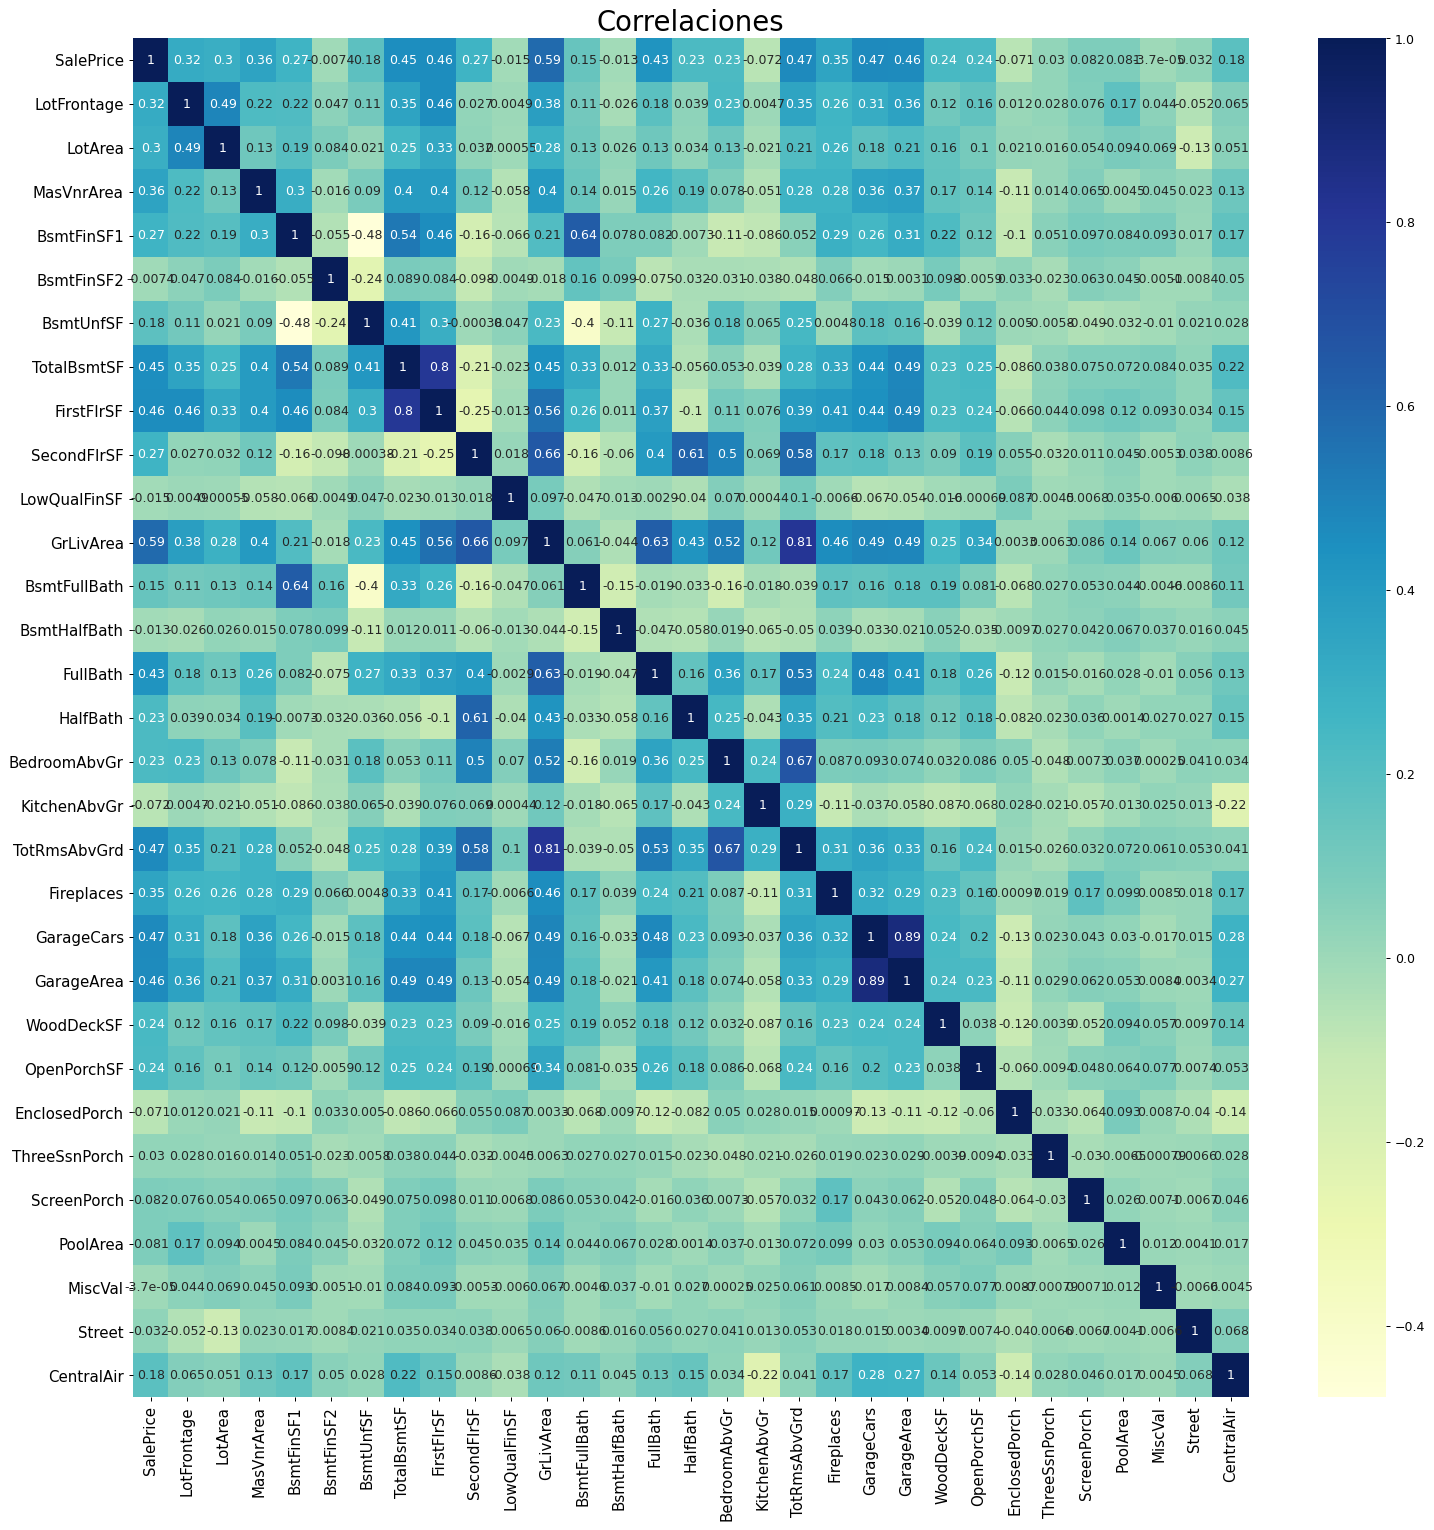

In [12]:
# Gráfica
plt.figure(figsize=(20, 20), dpi= 90)  
sns.heatmap(house[numeric].corr(method = 'pearson'), xticklabels = house[numeric].corr(method = 'pearson').columns, 
            yticklabels = house[numeric].corr(method = 'pearson').columns, cmap = 'YlGnBu', annot = True)
plt.title('Correlaciones', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Sustituyendo NaNs por la media de las columnas numéricas y por la moda para las columnas categóricas y las columnas que toman valores enteros.

In [13]:
numeric = list(['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 
                'OpenPorchSF', 'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Street', 
                'CentralAir'])
integers_wna = list(['BsmtFullBath', 'BsmtHalfBath', 'GarageCars'])

d = house.isna().sum()  # número de nas por columna


for i in range(0, len(house.columns)):
    if d[i] > 0:  # si tiene NaNs
        if house.columns[i] in numeric:  # si es numérica
            house[house.columns[i]] = house[house.columns[i]].fillna(house[house.columns[i]].mean())
        elif house.columns[i] in integers_wna:
            house[house.columns[i]] = house[house.columns[i]].fillna(float(house[house.columns[i]].mode()))
        else:
            house[house.columns[i]] = house[house.columns[i]].fillna(str(house[house.columns[i]].mode()))

In [14]:
# Ya no hay NaNs
d = house.isna().sum()  # número de nas por columna
print('número de NaNs:', sum(d[d != 0]))  # total de nas
print(d[d!=0])

número de NaNs: 0
Series([], dtype: int64)


# Las correlaciones de las variables que tenían NaNs disminuyen en valor absoluto.

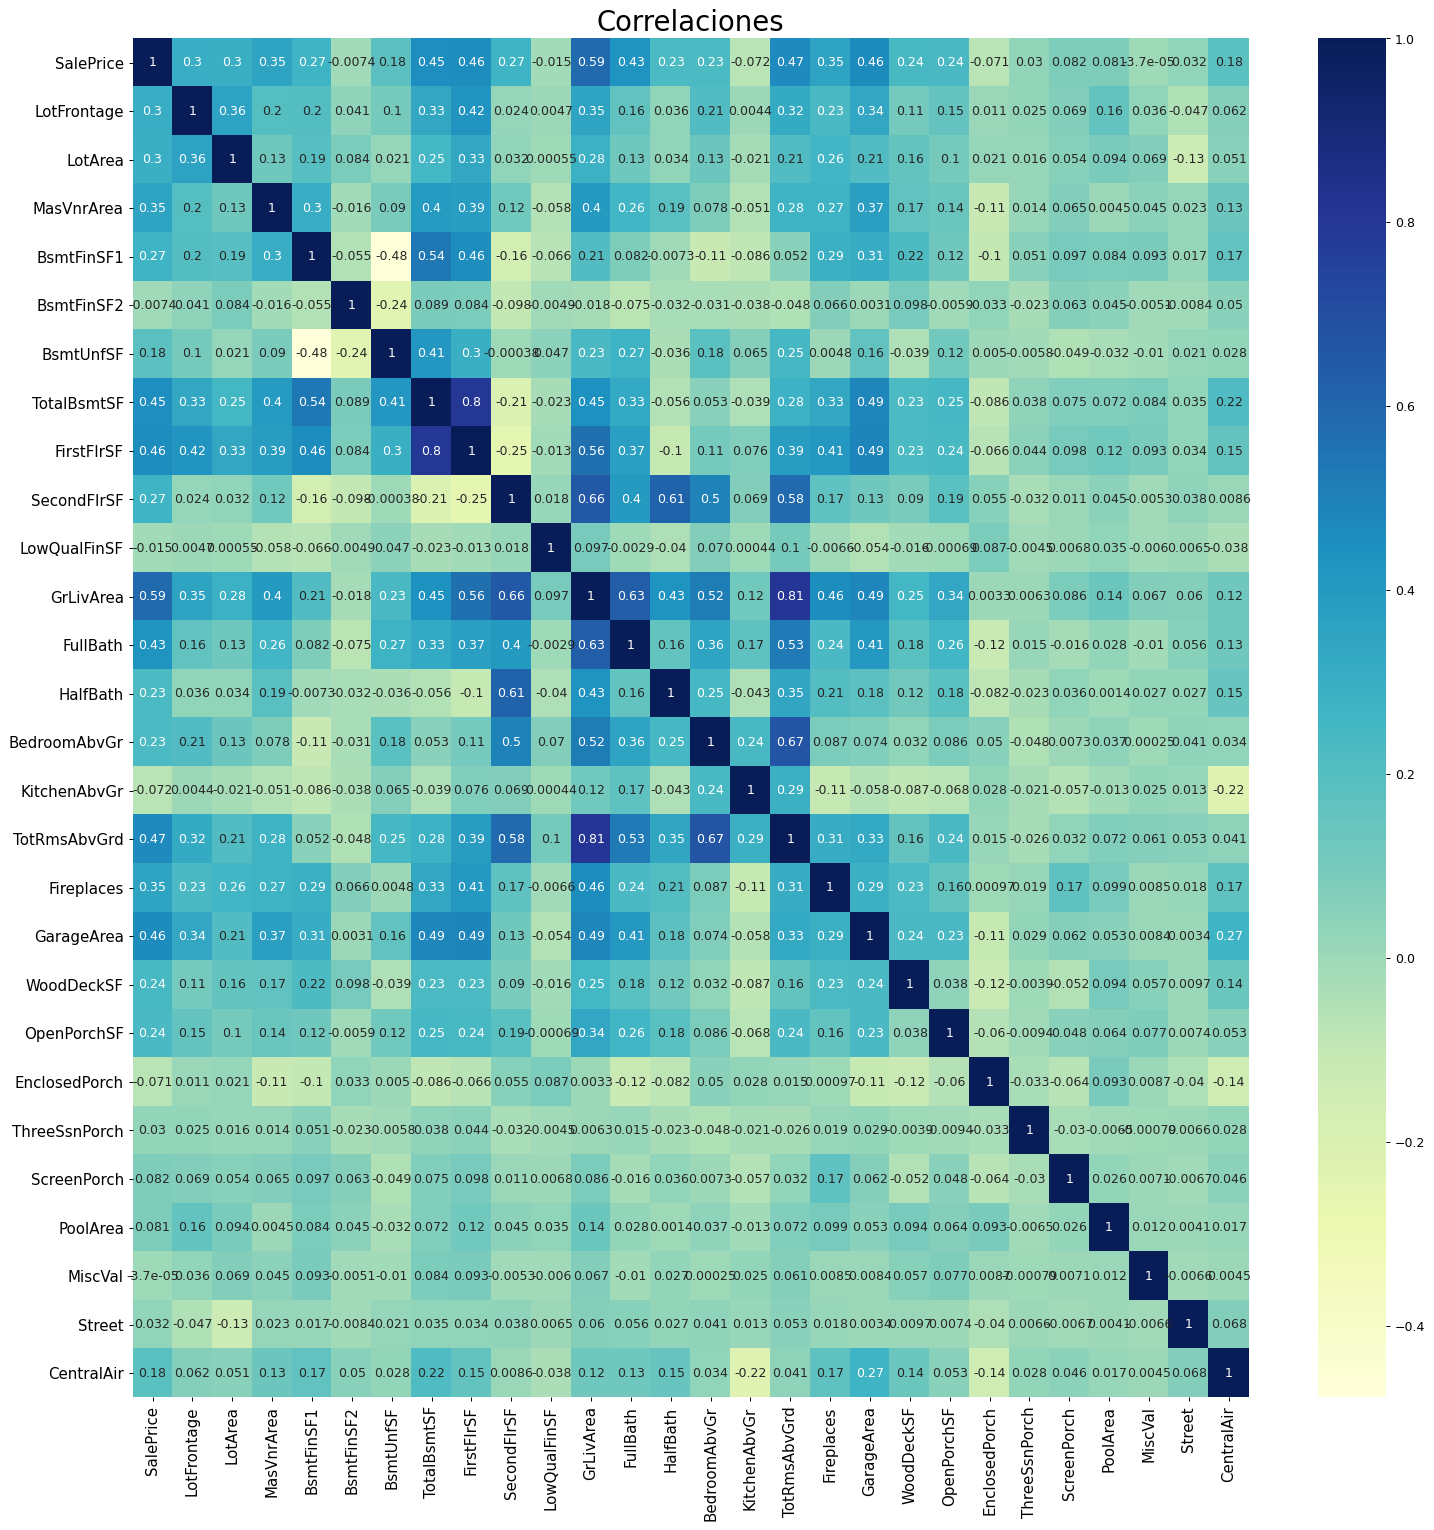

In [15]:
# Gráfica
plt.figure(figsize=(20, 20), dpi= 90)  
sns.heatmap(house[numeric].corr(method = 'pearson'), xticklabels = house[numeric].corr(method = 'pearson').columns, 
            yticklabels = house[numeric].corr(method = 'pearson').columns, cmap = 'YlGnBu', annot = True)
plt.title('Correlaciones', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# _Scatterplots_.

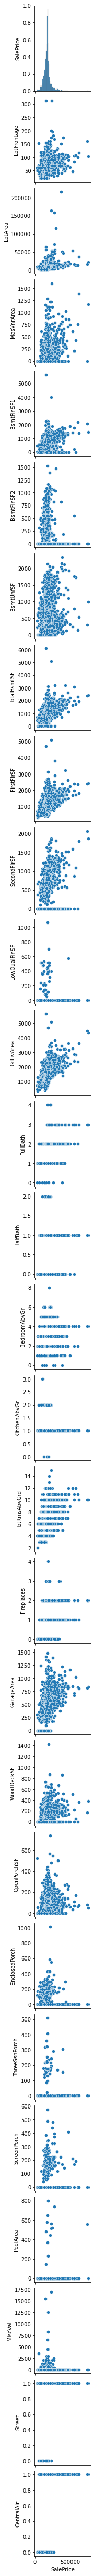

In [16]:
sns.pairplot(house, x_vars = 'SalePrice', y_vars = numeric)

# _Scatterplots_ de variables particulares.

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

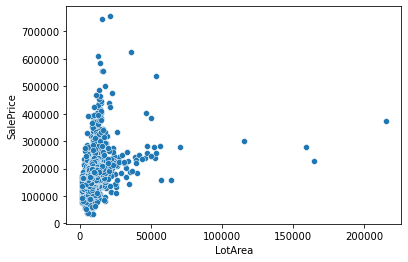

In [37]:
# LotArea: tamaño del lote en pies cuadrados
sns.scatterplot(data = house, y = 'SalePrice', x = 'LotArea')

# outliers

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

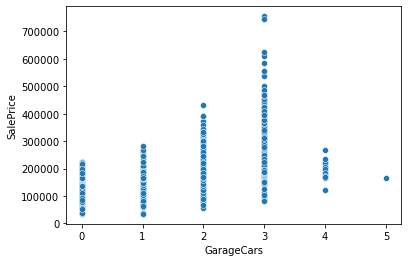

In [44]:
# Garage cars, tamaño de cochera en función de cuántos carros puede almacenar.
sns.scatterplot(data = house, y = 'SalePrice', x = 'GarageCars')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

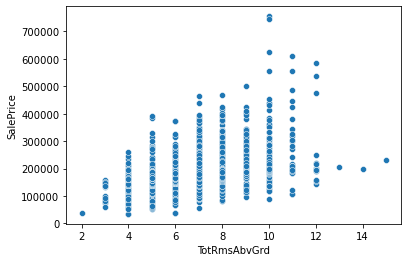

In [39]:
# número de cuartos que no están en el sótano y no son baños
sns.scatterplot(data = house, y = 'SalePrice', x = 'TotRmsAbvGrd')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

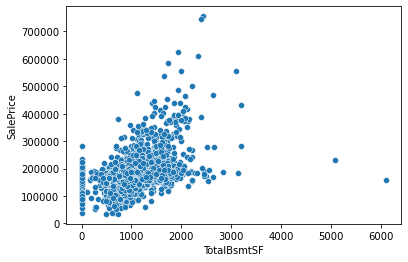

In [40]:
# Area total del sótano en pies.
sns.scatterplot(data = house, y = 'SalePrice', x = 'TotalBsmtSF')

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

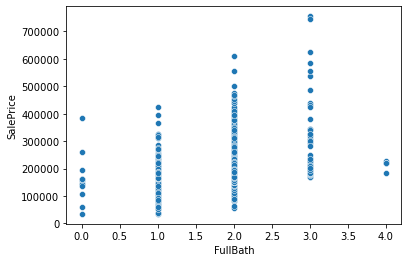

In [45]:
# Número de baños completos sin contar los del sótano.
sns.scatterplot(data = house, y = 'SalePrice', x = 'FullBath')

# Variables categóricas.

In [17]:
# Cambio tipos de variable a categóricas.
for i in range(0, len(house.columns)):
    if house.columns[i] not in numeric:  # entonces es categórica o toma valores enteros
        if house.columns[i] not in integers_wna:  # entonces es categórica
            house[house.columns[i]]  =  house[house.columns[i]].astype('category')

In [20]:
# Creando data frame con las variables categóricas
cat_variables = list()
for i in range(0, len(house.columns)):
    if house.columns[i] not in house[numeric].columns:
        cat_variables.append(house.columns[i])

print(house[cat_variables].info())  # 49 variables categóricas
print('Número de variables categóricas:', len(cat_variables) - 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     2919 non-null   category
 1   MSZoning       2919 non-null   category
 2   Alley          2919 non-null   category
 3   LotShape       2919 non-null   category
 4   LandContour    2919 non-null   category
 5   Utilities      2919 non-null   category
 6   LotConfig      2919 non-null   category
 7   LandSlope      2919 non-null   category
 8   Neighborhood   2919 non-null   category
 9   Condition1     2919 non-null   category
 10  Condition2     2919 non-null   category
 11  BldgType       2919 non-null   category
 12  HouseStyle     2919 non-null   category
 13  OverallQual    2919 non-null   category
 14  OverallCond    2919 non-null   category
 15  YearBuilt      2919 non-null   category
 16  YearRemodAdd   2919 non-null   category
 17  RoofStyle      2919 non-null   ca

# Gráficos de caja.

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

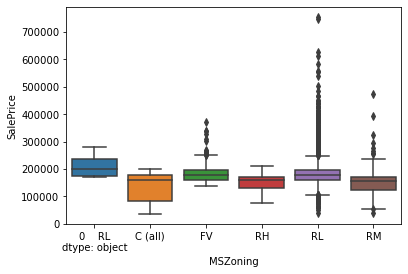

In [46]:
# MSZoning identifica la clasificación de la zona de la casa.
#A	Agriculture
#C	Commercial
#FV	Floating Village Residential
#I	Industrial
#RH	Residential High Density
#RL	Residential Low Density
#RP	Residential Low Density Park 
#RM	Residential Medium Density


sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = house)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

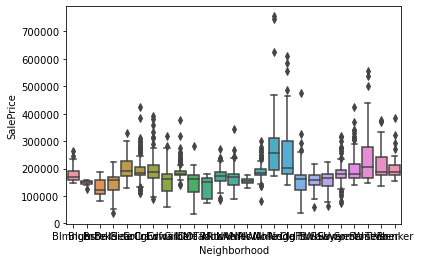

In [47]:
# Vecindario donde se encuentra la casa vendida.
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = house)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

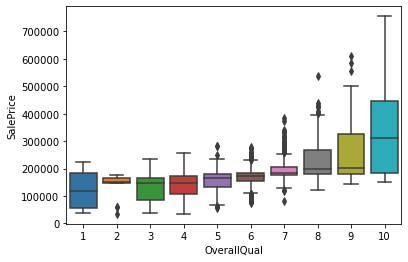

In [48]:
# Calidad general de los materiales y acabados de la casa.
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = house)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

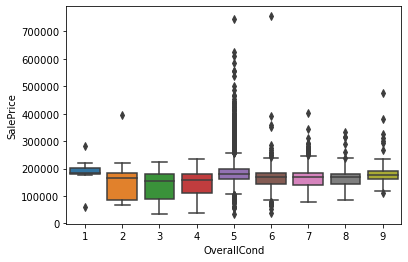

In [49]:
# Condición general de la casa.
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = house)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

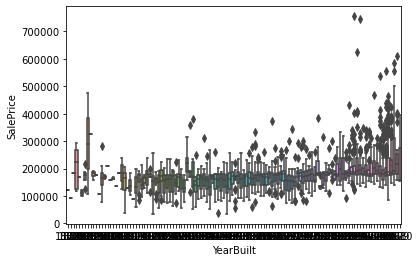

In [50]:
# Año en que se construyó la casa.
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = house)

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

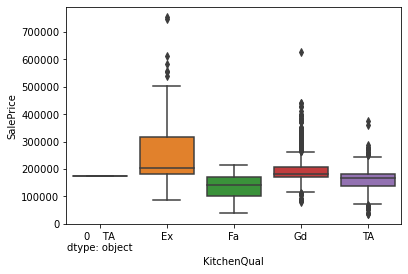

In [51]:
# Calidad de la cocina.
.boxplot(x = 'KitchenQual', y = 'SalePrice', data = house)

# Regresión lineal.

_difference_ es para enlistar las columnas quitando alguna y .join() va a sumar los elementos, en éste caso, las columnas sin 'SalePrice'

In [26]:
# Selecciono a las variables 
all_columns = " + ".join(house.columns.difference(["SalePrice"]))
formula = 'SalePrice ~ ' + all_columns

# Se puede leer en el output que hay fuertes problemas de mulcolinealidad. Situación perfecta para utilizar regularización.



In [27]:
#  Regresión lineal y tabla summary()
model = ols(formula, data = house)
LinearReg = model.fit()
print(LinearReg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     6.712
Date:                Thu, 14 Oct 2021   Prob (F-statistic):          5.45e-243
Time:                        14:06:52   Log-Likelihood:                -34703.
No. Observations:                2919   AIC:                         7.056e+04
Df Residuals:                    2342   BIC:                         7.401e+04
Df Model:                         576                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [28]:
# Norma l1
np.sum(np.abs(LinearReg.params.iloc[range(1, len(LinearReg.params)), ]))

17129723.91973112

In [29]:
# norma  l2
np.sqrt(np.sum(LinearReg.params.iloc[range(1, len(LinearReg.params)), ] ** 2))

1422867.4431920266

In [30]:
print('Número de parámetros:', len(LinearReg.params))  # OLS hace la codificación a dummies.

588


## Calidad del modelo.

El estadístico $R^2$_-ajustado_ está definido como (ISLR, p. 212):

$\begin{equation}
R^2-ajustado =1-\frac{RSS (n - 1)}{TSS  (n - d - 1)}
\end{equation}$

Donde $n$ es el número de observaciones, $d$ es el número de predictores del modelo y:

$\begin{equation}
RSS = \sum_{i=1}^n(y_i - \hat{y}_i)^2
\end{equation}$

$\begin{equation}
TSS  = \sum_{i=1}^n(y_i - \bar{y})^2
\end{equation}$

También se tienen el AIC y AIC (ISLR, p.212):

$\begin{equation}
BIC = \frac{1}{n\hat{\sigma}^2}(RSS + log(n)d\hat{\sigma}^2)
\end{equation}$

$\begin{equation}
AIC = \frac{1}{n\hat{\sigma}^2}(RSS + 2d\hat{\sigma}^2)
\end{equation}$

Y se uitiliza el estimador (Elements of stat, p.47):

$\begin{equation}
\hat{\sigma}^2 = \frac{1}{n - d - 1} RSS
\end{equation}$

In [31]:
n = 2919
d = len(LinearReg.params)
RSS = LinearReg.ssr
sigma2 = 1 / (n - d - 1) * RSS

# Resultados importantes, comparar r2-aj, aic y bic de todos los modelos.
print("r2:", LinearReg.rsquared)  # 0.623
print('R2-ajustado:', LinearReg.rsquared_adj)  # 0.53
#print('AIC:', LinearReg.aic)
#print('BIC:', LinearReg.bic)

bic = 1 / (n * sigma2) * (RSS + np.log(n) * d * sigma2)
aic = 1 / (n * sigma2) * (RSS + 2 * d * sigma2)

print('BIC:', bic)
print('AIC:', aic)

r2: 0.6227670806666225
R2-ajustado: 0.5299890441439814
BIC: 2.4054984124913394
AIC: 1.2010962658444675


El modelo con menores AIC y BIC va a predecir mejor un nuevo conjunto de datos. $R^2$-ajustado indica si el modelo fue ajustado con las variables correctas.

# Errores.

In [14]:
### Error aparente
y_pred = LinearReg.predict(house)
#rmse_aparente = np.sqrt(np.power(house['SalePrice'] - y_pred, 2).mean())
#print('Error aparente:', rmse_aparente)  

print('Error aparente:', rmse(house['SalePrice'], y_pred))  

Error aparente: 35237.31289492754


In [36]:
training_mse = list()
test_mse = list()

for i in range(0, 1000):
    # train/test split. Proporción 80*2
    seq = list(range(0, 2919))
    np.random.seed(i)
    train = np.random.choice(seq, size = 2335, replace = False)
    
    test = list()
    for i in seq:
        if i not in train:
            test.append(i)
            
    training_set = house.iloc[train, :]
    test_set = house.iloc[test, :]
    
    # Se calculan los errores
    # Entrenando al modelo con el conjunto de entrenamiento.
    training_model = ols(formula, data = training_set).fit()
    
    ### training rmse
    y_pred = training_model.predict(training_set)
    training_mse.append(rmse(training_set['SalePrice'], y_pred))
    
    ### test rmse
    y_pred = training_model.predict(test_set)
    test_mse.append(rmse(test_set['SalePrice'], y_pred))
    
print('Training RMSE:', np.mean(training_mse))  # 34128.82
print('Test MSE:', np.mean(test_mse))           # 49971.55

Training RMSE: 34128.82021866496
Test MSE: 49971.54513309311


# Regularización.

## Lasso.

Se deben centrar y estandarizar los parámetros antes de hacer el ajuste pues los coeficientes no son equivariantes en escala.

Además se debe hacer la codificación a variables dummies manualmente.

In [20]:
# Codificación a variables dummies
house_dummies = pd.get_dummies(house.loc[:, house.columns != 'SalePrice'], drop_first = True)  # dropfirst para que se queda con k-1

# Estandarización
scaler = StandardScaler()
X = scaler.fit(house_dummies).transform(house_dummies)

# Variable respuesta original y centrada.
y = house['SalePrice']

##  Se ajusta el modelo utilizando 10-CV para encontrar al tuning parameter $\lambda$.

In [21]:
# Modelo Lasso y tuning parameter
lasso = LassoCV(fit_intercept = True, cv = 10, random_state = 101, max_iter = 5000).fit(X, y)
lasso_alpha = lasso.alpha_
print('Parámetro Lambda:', lasso_alpha)  # 2551.94

Parámetro Lambda: 2551.9420140852985


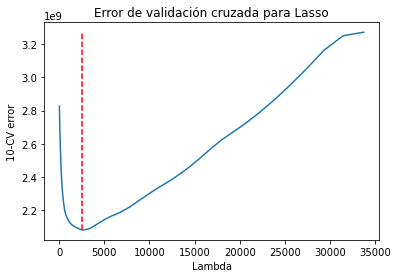

In [22]:
# Promediando los errores 10-CV de cada valor lambda.
cv_lasso = lasso.mse_path_.mean(axis = 1)
cv_lasso = pd.DataFrame(cv_lasso, index = lasso.alphas_)

# Gráfica lambda vs 10-CV
cv_lasso.plot(title = "Error de validación cruzada para Lasso")
plt.xlabel("Lambda")
plt.ylabel('10-CV error')
plt.vlines(x = lasso_alpha, ymin = np.min(cv_lasso), ymax = np.max(cv_lasso), colors = 'red', linestyles = 'dashed')
plt.legend().remove()
plt.show()

In [24]:
# Veamos los coeficientes Lasso
print('Intercepto:', lasso.intercept_)  # 180052.85464749733
coef = pd.Series(lasso.coef_, index = house_dummies.columns)
print('Número de coeficientes distintos de cero:', len(coef[coef != 0]), 'más el intercepto.')
print(coef[coef != 0])

Intercepto: 180052.85464749733
Número de coeficientes distintos de cero: 37 más el intercepto.
LotArea                  4979.407615
MasVnrArea                 94.304526
TotalBsmtSF              4399.732171
CentralAir                123.899441
GrLivArea               14358.863462
FullBath                 1185.944068
KitchenAbvGr            -2423.636277
TotRmsAbvGrd             4177.658386
Fireplaces                893.459140
GarageCars               4720.972246
GarageArea                559.755442
MSZoning_RL              1790.985122
MSZoning_RM              -158.302751
Neighborhood_Edwards     -279.066526
Neighborhood_NoRidge     3218.143881
Neighborhood_NridgHt      343.057226
Neighborhood_StoneBr      241.102566
Condition2_Norm            27.927945
OverallQual_8            1254.122408
OverallQual_10           2581.273178
OverallCond_4            -595.216503
YearBuilt_2008            162.125374
RoofMatl_WdShngl         2768.197596
MasVnrType_Stone          957.081527
ExterQual_TA     

In [25]:
# Norma l1
np.sum(np.abs(coef))

66951.32848278183

# Errores.

In [26]:
# Error aparente
y_pred = lasso.predict(X)
print('Error aparente:', rmse(y, y_pred))

Error aparente: 40988.40171143199


In [28]:
training_mse = list()
test_mse = list()

for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i) 
    lasso = Lasso(fit_intercept = True, alpha = lasso_alpha).fit(x_train, y_train)
    
    # Training RMSE
    y_pred = lasso.predict(x_train)
    training_mse.append(rmse(y_train, y_pred))
    
    # Test RMSE
    y_pred = lasso.predict(x_test)
    test_mse.append(rmse(y_test, y_pred))
print('Training MSE:', np.mean(training_mse))  # 40639.65
print('Test MSE:', np.mean(test_mse))          # 42440.39

Training MSE: 40639.6490364741
Test MSE: 42440.39139766224


## Calidad del modelo.

In [29]:
y_pred = lasso.predict(X)
RSS = np.power(y - y_pred, 2).sum()
TSS = np.power(y - y.mean(), 2).sum()
sigma2 = 1 / (n - d - 1) * RSS


n = len(y_pred)
d = len(coef[coef != 0]) + 1

r2 = 1 - RSS / TSS
r2_adj = 1- (RSS / (n - d - 1)) / (TSS / (n - 1))
print('R2:', r2)
print('R2-ajustado:', r2_adj)

bic = 1 / (n * sigma2) * (RSS + np.log(n) * d * sigma2)
aic = 1 / (n * sigma2) * (RSS + 2 * d * sigma2)

print('BIC:', bic)
print('AIC:', aic)

R2: 0.5008541575311718
R2-ajustado: 0.4942682054430415
BIC: 0.9020903946873781
AIC: 0.8242548818088388


# Ridge.

In [30]:
# Modelo Lasso y tuning parameter
ridge = RidgeCV(fit_intercept = True, store_cv_values = True).fit(X, y)
ridge_alpha = ridge.alpha_
print('Parámetro Lambda:', ridge_alpha)

Parámetro Lambda: 10.0


In [31]:
# Veamos los coeficientes Lasso
print('Intercepto:', ridge.intercept_)
coef = pd.Series(ridge.coef_, index = house_dummies.columns)
#print('Número de coeficientes distintos de cero:', len(coef[coef != 0]), 'más el intercepto.')
print(coef)

Intercepto: 180052.85464749733
LotFrontage               126.494803
LotArea                  8159.498217
Street                   1374.246994
MasVnrArea                677.343756
BsmtFinSF1               2679.119092
                            ...     
SaleCondition_AdjLand    -324.722497
SaleCondition_Alloca      795.352513
SaleCondition_Family      323.986097
SaleCondition_Normal     1532.994469
SaleCondition_Partial   -2322.849803
Length: 587, dtype: float64


In [32]:
# norma  l2
np.sqrt(np.sum(coef ** 2))

67884.25524495798

In [33]:
# Error aparente
y_pred = ridge.predict(X)
print('Error aparente:', rmse(y, y_pred))

Error aparente: 35353.399153690996


In [34]:
training_mse = list()
test_mse = list()

for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i) 
    ridge = Ridge(fit_intercept = True, alpha = ridge_alpha).fit(x_train, y_train)
    
    # Training RMSE
    y_pred = ridge.predict(x_train)
    training_mse.append(rmse(y_train, y_pred))
    
    # Test RMSE
    y_pred = ridge.predict(x_test)
    test_mse.append(rmse(y_test, y_pred))
    
print('Training MSE:', np.mean(training_mse))  # 34254.56
print('Test MSE:', np.mean(test_mse))          # 34254.561

Training MSE: 34254.5616808798
Test MSE: 48079.010897947046


In [35]:
y_pred = ridge.predict(X)
RSS = np.power(y - y_pred, 2).sum()
TSS = np.power(y - y.mean(), 2).sum()
sigma2 = 1 / (n - d - 1) * RSS


n = len(y_pred)
d = len(coef[coef != 0]) + 1

r2 = 1 - RSS / TSS
r2_adj = 1- (RSS / (n - d - 1)) / (TSS / (n - 1))
print('R2:', r2)
print('R2-ajustado:', r2_adj)

bic = 1 / (n * sigma2) * (RSS + np.log(n) * d * sigma2)
aic = 1 / (n * sigma2) * (RSS + 2 * d * sigma2)

print('BIC:', bic)
print('AIC:', aic)

R2: 0.5780646450472866
R2-ajustado: 0.4715848215656576
BIC: 2.5939191045091534
AIC: 1.389516957862282


# Conclusiones.

El modelo _Lasso_ es el mejor pues tiene menos variables, lo cual ayuda a la interpretabilidad, y tiene menor error de prueba y menores AIC y BIC.

El modelo _Ridge_ también supera al modelo de regresión lineal múltiple en éste aspecto. Sin embargo el modelo de regresión lineal fue el que tuvo mayor estadístico $R^2$-ajustado lo cual indica que _Lasso_ podría estar omitiendo algunas variables correctas.